### BNZ-LTER Thaw Gradient Water Table Depth 

THe following script is intended to merge multiple files containing seasonal water table depth data at a thaw gradient site in Eight Mile Lake (EML) from years 2004-2020. The metadata for the following datasetes can be found here: 

DOI: http://dx.doi.org/10.6073/pasta/1d382beba150ee4ff5d7c1b941cf3153

In [27]:
import numpy as np
import pandas as pd 
from datetime import datetime

Variables avaialble within this dataset include: Water Table Depth (cm)

List of urls containing the csvs corresponding to each dataset for water table depth for EML gradient site

In [28]:
urls=["https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/564_Gradient_WTD_2004_2013.csv",
     "https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/564_Gradient_WTD_2014.csv",
     "https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/564_Gradient_WTD_2015.csv",
     "https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/564_Gradient_WTD_2016.csv",
     "https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/564_Gradient_WTD_2017.csv",
     "https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/564_Gradient_WTD_2018.csv",
     "https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/564_Gradient_WTD_2019.csv",
    "https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/564_Gradient_WTD_2020.csv" 
     ]

Call in each dataset, provide the column names and determine the Na-values associated (-9999, NaN)

In [29]:
dflist=[]
for i in range(len(urls)):
    df =pd.read_csv(urls[i]
          ,skiprows=1
            ,sep=","  
           , names=[
                    "Date",     
                    "Doy",     
                    "Site",     
                    "Well",     
                    "WTD"    ]
            ,na_values={'-9999.0','NaN'})
    dflist.append(df)
  

Print information pertaining to each dataset

In [30]:
for k in dflist:
    print(k.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1203 non-null   object 
 1   Doy     1203 non-null   int64  
 2   Site    1203 non-null   object 
 3   Well    1203 non-null   int64  
 4   WTD     1184 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 47.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    81 non-null     object 
 1   Doy     81 non-null     int64  
 2   Site    81 non-null     object 
 3   Well    81 non-null     int64  
 4   WTD     72 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  


Print unique site names in each dataset to see if naming conventions are uniform across all..
If not will need to modify them in order to merge files later on..

In [31]:
for l in dflist:
    print(l['Site'].unique())

['Extensive' 'Moderate ' 'Minimal ' 'Extensive  ' 'Moderate' 'Minimal']
['Extensive' 'Minimal' 'Moderate']
['Extensive' 'Moderate' 'Minimal']
['Extensive' 'Moderate' 'Minimal']
['Extensive' 'Moderate' 'Minimal']
['Extensive' 'Moderate' 'Minimal']
['Extensive' 'Moderate' 'Minimal']
['Extensive' 'Moderate' 'Minimal']


As shown above, there appears to be added spacing to the Site. To merge these dataframes, the site naming must be uniform

In [32]:
for e in dflist:
    e['Site']=e['Site'].replace({'Extensive ':'Extensive','Extensive  ':'Extensive','Moderate ':'Moderate','Minimal ':'Minimal'})
    print(e['Site'].unique()) #check to make sure each dataframe contains the same site naming convention

['Extensive' 'Moderate' 'Minimal']
['Extensive' 'Minimal' 'Moderate']
['Extensive' 'Moderate' 'Minimal']
['Extensive' 'Moderate' 'Minimal']
['Extensive' 'Moderate' 'Minimal']
['Extensive' 'Moderate' 'Minimal']
['Extensive' 'Moderate' 'Minimal']
['Extensive' 'Moderate' 'Minimal']


Print out well names within each dataset..
In this case there appears to be a combination of different naming conventions associated with well..

In [33]:
for g in dflist:
    print(g['Well'].unique())

[1 2 3]
[1 2 3]
[1 2 3]
[1 2 3]
[1 2 3]
[1 2 3]
['1_2' '3_4' '5_6' '7_8' '9_10' '11_12' '1' '2' '3' '13_14' '15_16'
 '17_18' '19_20' '21_22' '23_24' '25_26' '27_28' '29_30' '31_32' '33_34'
 '35_36']
['1_2' '3_4' '5_6' '7_8' '9_10' '11_12' '13_14' '15_16' '17_18' '19_20'
 '21_22' '23_24' '25_26' '27_28' '29_30' '31_32' '33_34' '35_36' 'Ext 1'
 'Ext 2' 'Ext 3' 'Min 1' 'Min 2' 'Min 3' 'Mod 1' 'Mod 2' 'Mod 3']


Concatenate the list of dataframes into one..
plot out water table depth to see if any issues pop up in the data

In [38]:
emlwtd=pd.concat(dflist)
emlwtd.head()

,Date,Doy,Site,Well,WTD
0,6/18/2004,170,Extensive,1,9.0
1,6/18/2004,170,Extensive,2,17.0
2,6/18/2004,170,Extensive,3,57.0
3,6/18/2004,170,Moderate,1,12.0
4,6/18/2004,170,Moderate,2,17.0


Convert date into datetime format and add associated year column..
Print out merged dataset information to ensure nothing alarming appears

In [35]:
emlwtd['Date']=pd.to_datetime(emlwtd['Date'])
emlwtd["Year"]=emlwtd['Date'].dt.year
emlwtd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2358 entries, 0 to 398
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2358 non-null   datetime64[ns]
 1   Doy     2358 non-null   int64         
 2   Site    2358 non-null   object        
 3   Well    2358 non-null   object        
 4   WTD     2315 non-null   float64       
 5   Year    2358 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 129.0+ KB


<AxesSubplot:>

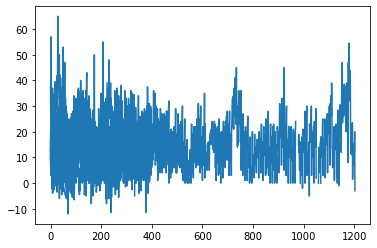

In [39]:
emlwtd.WTD.plot()

When done cleaning/processing the merged dataset, export as csv and re-index

In [37]:
emlwtd.index = emlwtd['Date']
emlwtd.to_csv('AK_EML_LTER_Gradient_WTD_2004_2020.csv')